In [ ]:
import pandas as pd
import random as rand
import statistics
from sklearn import preprocessing
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import NearestNeighbors                        
from sklearn.metrics import recall_score, f1_score ,auc,roc_curve,classification_report, precision_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
precision=[]
recall=[]
accuracy=[]
fscore=[]
AUC=[]

precision_train=[]
recall_train=[]
accuracy_train=[]
fscore_train=[]
AUC_train=[]

In [6]:
for m in range(30):
    data= pd.read_csv('wdbc.data')
    data.columns=['IDs','Diagnosis','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
    
    data_x = data.drop(['IDs','Diagnosis'],axis=1)
    data_x_normalize = pd.DataFrame(preprocessing.normalize(data_x))
    data = pd.concat([data[['Diagnosis']],data_x_normalize],axis=1)
    data["Diagnosis"] = data["Diagnosis"].map( {'M':0, 'B':1} )

    data_malignant = data[ data['Diagnosis'] == 0]
    data_malignant_20_test = data_malignant.sample(frac=.20,random_state=rand.randint(0,100))
    
    data_benign = data[data['Diagnosis'] == 1]
    data_benign_20_test= data_benign.sample(frac=.20,random_state=rand.randint(1,100))
    
    test_data = pd.concat([data_malignant_20_test,data_benign_20_test]) 
    train_data = data.drop(test_data.index)
    test_x = test_data.drop('Diagnosis',axis=1)
    test_y = test_data['Diagnosis']
    train_x = train_data.drop('Diagnosis',axis=1)
    train_y = train_data['Diagnosis']
    
    sc=SpectralClustering(n_clusters=2,affinity='rbf',n_init=5,random_state=rand.randint(0,100))
    sc.fit(train_x)
    speclabels = pd.DataFrame(sc.labels_)
    
    label0= speclabels[speclabels[0]==0].index 
    label1=speclabels[speclabels[0]==1].index
    
    cluster0=train_x.iloc[label0,:]
    cluster1=train_x.iloc[label1,:]
    center0=cluster0.mean(axis=0)
    center1=cluster1.mean(axis=0)
    centers = pd.DataFrame()
    centers[0] = center0
    centers[1] = center1
    
    nbrs = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(train_x)
    distances, indices = nbrs.kneighbors(centers.T)
    
    clus0= train_y.iloc[indices[0]]
    clus1=train_y.iloc[indices[1]]
    poll0=clus0.value_counts()  
    poll1=clus1.value_counts()
    
    pred_y = sc.labels_
    pred_y=pd.DataFrame(pred_y)
    pred_y0=pred_y[pred_y[0]==0].copy()
    pred_y1=pred_y[pred_y[0]==1].copy()
    
    max_index_0=poll0.idxmax()
    max_index_1=poll1.idxmax()
   
    pred_y0['class']=max_index_0
    pred_y1['class']=max_index_1
    pred_y_tr=pd.concat([pred_y0['class'],pred_y1['class']],axis=0)
    pred_y_tr=pred_y_tr.sort_index()
   
    #train
    precision_train.append(precision_score(train_y, pred_y_tr))
    recall_train.append(recall_score(train_y, pred_y_tr))
    accuracy_train.append(accuracy_score(train_y, pred_y_tr)) 
    fscore_train.append(f1_score(train_y, pred_y_tr))
    fpr_tr, tpr_tr, _ = roc_curve(train_y,pred_y_tr)
    AUC_train.append(auc(fpr_tr, tpr_tr))
    
    #test
    pred_y_test = sc.fit_predict(test_x)
    precision.append(precision_score(test_y, pred_y_test))
    recall.append(recall_score(test_y, pred_y_test))
    accuracy.append(accuracy_score(test_y, pred_y_test)) 
    fscore.append(f1_score(test_y, pred_y_test))
    fpr, tpr, _ = roc_curve(test_y,pred_y_test)
    AUC.append(auc(fpr, tpr))

In [7]:
print("Train Values")
print("avg  precision score: ",statistics.mean(precision_train))
print("avg  f1 score: ",statistics.mean(fscore_train))
print("avg  recall score: ",statistics.mean(recall_train))
print("avg AUC score: ",statistics.mean(AUC_train))
print("avg acuracy score: ",statistics.mean(accuracy_train))

print("TEST values")
print("avg precision score: ",statistics.mean(precision))
print("avg f1 score: ",statistics.mean(fscore))
print("avg recall score: ",statistics.mean(recall))
print("avg AUC score: ",statistics.mean(AUC))
print("avg acuracy score: ",statistics.mean(accuracy))

Train Values
avg  precision score:  0.8556479536852397
avg  f1 score:  0.9143945229701465
avg  recall score:  0.9819347319347319
avg AUC score:  0.8506320602474449
avg acuracy score:  0.8843956043956044
TEST values
avg precision score:  0.22829290453232653
avg f1 score:  0.21907742585670542
avg recall score:  0.22065727699530516
avg AUC score:  0.2936619718309859
avg acuracy score:  0.27492625368731566


Train Area under the curve


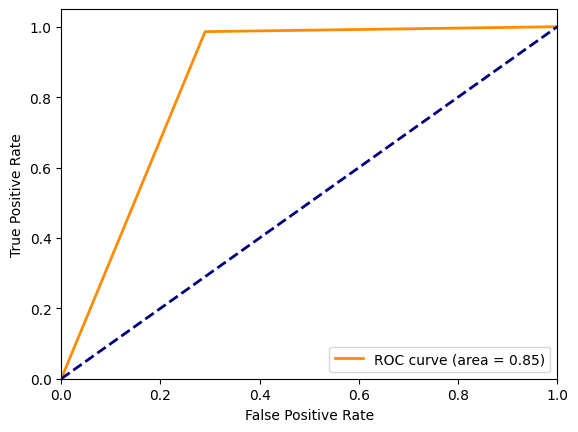

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Train Area under the curve")
plt.figure()
lw=2
plt.plot(fpr_tr, tpr_tr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_tr, tpr_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()

Test Area under the curve


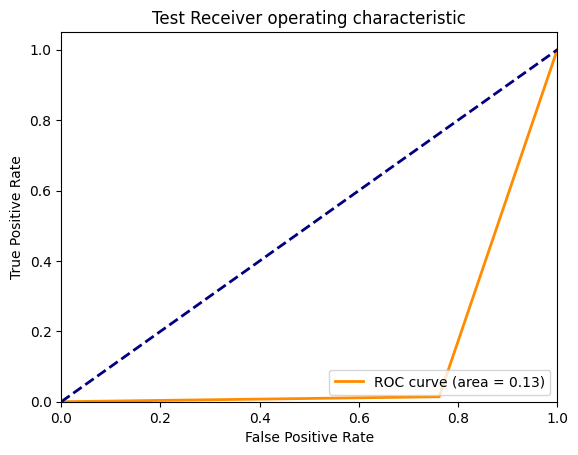

In [9]:
print("Test Area under the curve")
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(test_y, pred_y_test)
print("Confusion Matrix test: ")
print(conf)

conf_tr = confusion_matrix(train_y, pred_y_tr)
print("Confusion Matrix train: ")
print(conf_tr)

Confusion Matrix test: 
[[10 32]
 [70  1]]
Confusion Matrix train: 
[[120  49]
 [  4 282]]
